<a href="https://colab.research.google.com/github/Ramya1410/Car-License-Plate-Detection/blob/main/Project(2)_Car_License_Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/CarLicensePlatesPascalVOC.zip' -d '/content/drive/MyDrive/Car License Plates'

Archive:  /content/drive/MyDrive/CarLicensePlatesPascalVOC.zip
   creating: /content/drive/MyDrive/Car License Plates/annotations/
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars213.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars213.xml  
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars207.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars207.xml  
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars398.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars398.xml  
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars367.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars367.xml  
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars401.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars401.xml  
  in

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

We create the variable X containing all the images of cars by resizing them to 200 * 200.

In [ ]:
IMAGE_SIZE = 200

In [ ]:
img_dir = "/content/drive/MyDrive/Car License Plates/images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = '/content/drive/MyDrive/Car License Plates/annotations'
text_files = ["/content/drive/MyDrive/Car License Plates/annotations/" + f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [ ]:
resizeannotation("/content/drive/MyDrive/Car License Plates/annotations/Cars147.xml")

[168, 126, 90, 93]

In [ ]:
y[:5]

[[167, 129, 90, 93],
 [131, 129, 67, 103],
 [151, 131, 70, 4],
 [107, 98, 87, 85],
 [120, 146, 83, 134]]

In [ ]:
np.array(X).shape

(433, 200, 200, 3)

In [ ]:
np.array(y).shape

(433, 4)

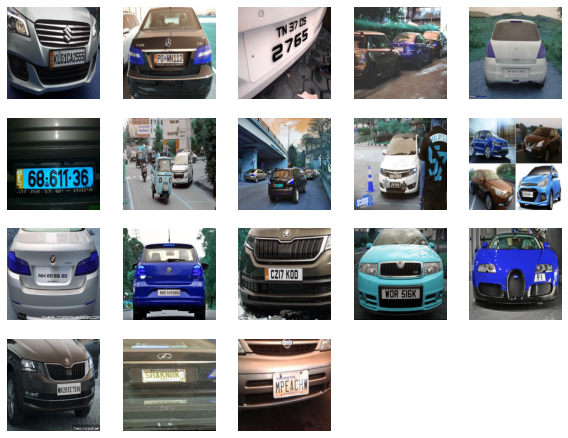

In [ ]:
plt.figure(figsize=(10,20))
for i in range(0,18) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

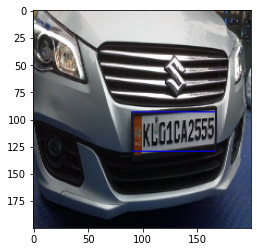

In [ ]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

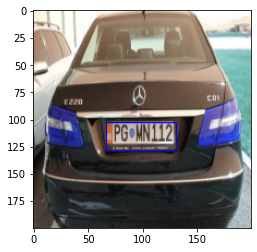

In [ ]:
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

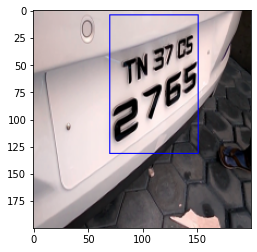

In [ ]:
image = cv2.rectangle(X[2],(y[2][0],y[2][1]),(y[2][2],y[2][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

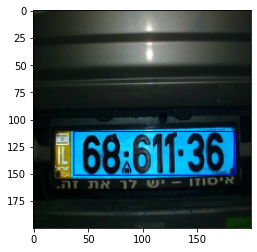

In [ ]:
image = cv2.rectangle(X[5],(y[5][0],y[5][1]),(y[5][2],y[5][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

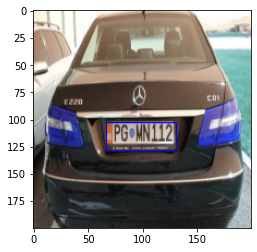

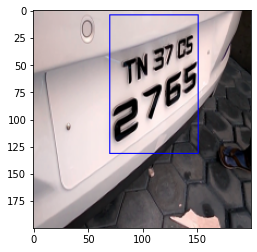

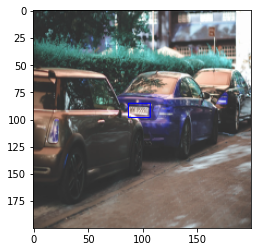

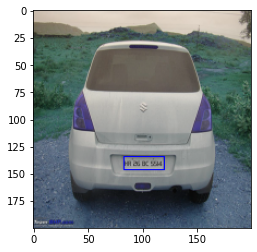

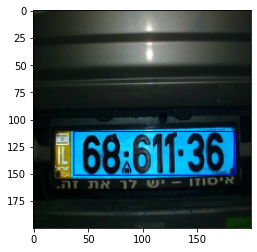

In [ ]:
for i in range(1,6):
  image = cv2.rectangle(X[i],(y[i][0],y[i][1]),(y[i][2],y[i][3]),(0, 0, 255))
  plt.imshow(image)
  plt.show()

In [ ]:
#Transforming in array
X=np.array(X)
y=np.array(y)

In [ ]:
#Renormalisation
X = X / 255
y = y / 255

In [ ]:
pip install pillow

In [ ]:
from PIL import Image

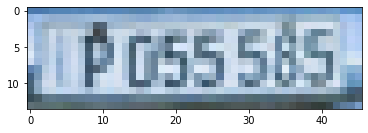

In [ ]:
im = Image.open('/content/drive/MyDrive/Car License Plates/images/Cars220.png')
im = im.crop( (142, 168, 188, 182) )  
plt.imshow(im)


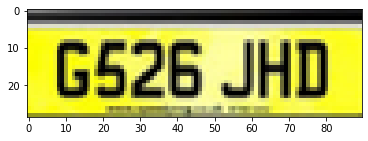

In [ ]:
im = Image.open('/content/drive/MyDrive/Car License Plates/images/Cars425.png')
im = im.crop( (211, 103, 301, 132) )  
plt.imshow(im)


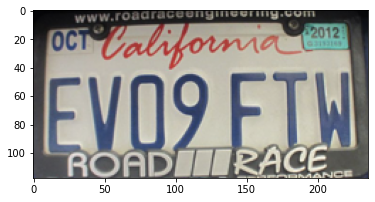

In [ ]:
im = Image.open('/content/drive/MyDrive/Car License Plates/images/Cars176.png')
im = im.crop( (72, 67, 308, 185) )  
plt.imshow(im)


In [ ]:
from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

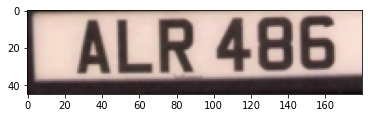

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars14.png')
im = im.crop( (94, 118, 274, 163) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars14.png')
plt.imshow(im)

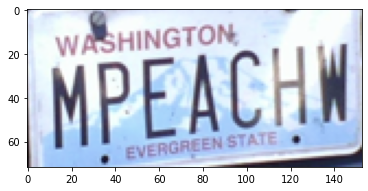

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars180.png')
im = im.crop( (151, 115, 304, 187) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars180.png')
plt.imshow(im)

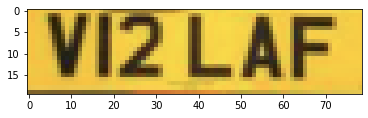

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars182.png')
im = im.crop( (168, 139, 247, 159) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars182.png')
plt.imshow(im)

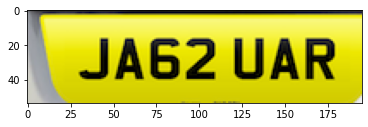

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars225.png')
im = im.crop( (189, 161, 384, 215) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars225.png')
plt.imshow(im)

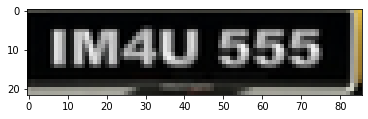

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars234.png')
im = im.crop( (160, 149, 246, 171) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars234.png')
plt.imshow(im)

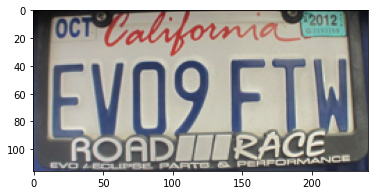

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars385.png')
im = im.crop( (69, 75, 310 , 191) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars385.png')
plt.imshow(im)

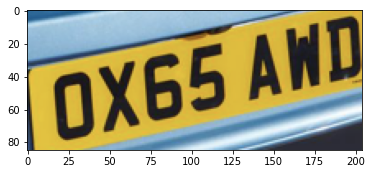

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars418.png')
im = im.crop( (99, 70, 303, 155) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars418.png')
plt.imshow(im)

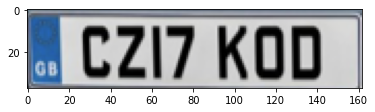

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars74.png')
im = im.crop( (115, 115, 277, 153) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars74.png')
plt.imshow(im)

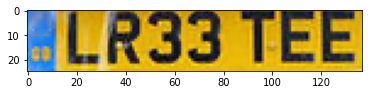

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars197.png')
im = im.crop( (222, 176, 359, 201) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars197.png')
plt.imshow(im)

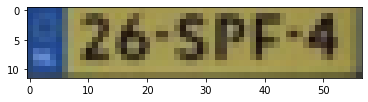

In [ ]:
im = Image.open('/content/drive/MyDrive/Project Images/Copy of Cars222.png')
im = im.crop( (178, 158, 235, 170) ) # previously, image was 826 pixels wide, cropping to 825 pixels wide
im.save('/content/drive/MyDrive/Project Images/Copy of Cars222.png')
plt.imshow(im)

In [ ]:
data_dir = Path("/content/drive/MyDrive/Project Images")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
labels = [img.split(os.path.sep)[-1].split(".png")[0] for img in images]
characters = set(char for label in labels for char in label)

print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width = 200
img_height = 50

# Factor by which the image is going to be downsampled
# by the convolutional blocks. We will be using two
# convolution blocks and each block will have
# a pooling layer which downsample the features by a factor of 2.
# Hence total downsampling factor would be 4.
downsample_factor = 4

# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])

Number of images found:  10
Number of labels found:  10
Number of unique characters:  18
Characters present:  {'0', '5', '9', 'f', '3', 's', 'p', 'r', '1', '2', 'C', ' ', '8', 'a', '7', 'o', 'y', '4'}


In [ ]:
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)


def split_data(images, labels, train_size=0.9, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid


# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = split_data(np.array(images), np.array(labels))


def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

InvalidArgumentError: ignored

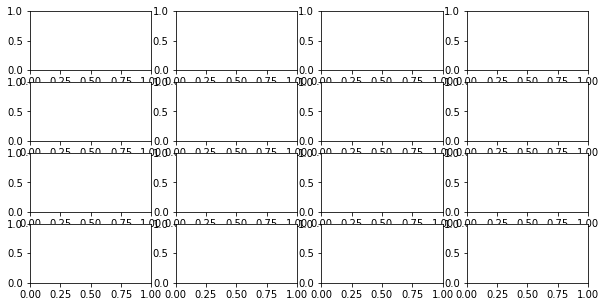

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint32")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [ ]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 200, 50, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 200, 50, 32)  320         image[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 100, 25, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 100, 25, 64)  18496       pool1[0][0]                      
_______________________________________________________________________________________

In [ ]:
epochs = 20
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

InvalidArgumentError: ignored

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 200, 50, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 200, 50, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 100, 25, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 100, 25, 64)       18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 50, 12, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 50, 768)           0         
_________________________________________________________________
dense1 (Dense)               (None, 50, 64)            49216 

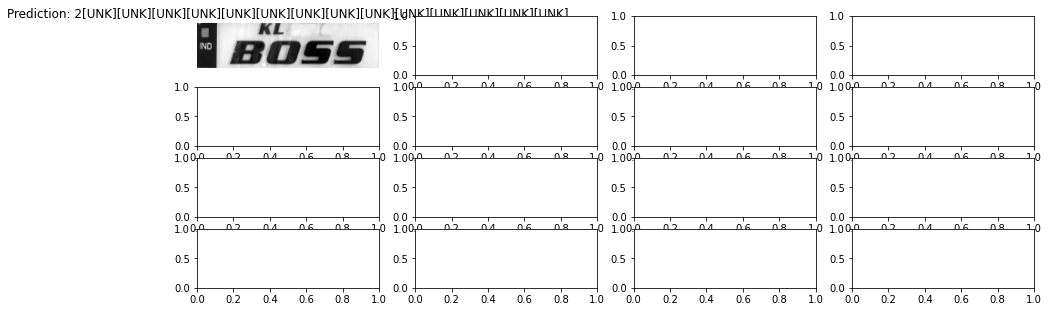

In [ ]:
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()